## 1. An MNIST Classifier With Over 97% Accuracy

In [2]:
import pandas as pd
import numpy

In [3]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame= False)

KeyboardInterrupt: 

In [ ]:
X,y = mnist.data,mnist.target
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [ ]:
knn_clf.weights

'uniform'

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(knn_clf,X_train,y_train,cv=3,scoring="accuracy")

array([0.9676 , 0.9671 , 0.96755])

In [ ]:
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([("Classifier",knn_clf)])
full_pipeline

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('Classifier', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be sq

In [ ]:
param_grid = [{"Classifier__n_neighbors":[2,4,6],"Classifier__weights":["distance"]},
              {"Classifier__n_neighbors":[2,4,6],"Classifier__weights":["uniform"]}]
grid_search = GridSearchCV(full_pipeline,param_grid,cv=3,scoring="accuracy")
grid_search.fit(X_train,y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...lassifier())])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","[{'Classifier__n_neighbors': [2, 4, ...], 'Classifier__weights': ['distance']}, {'Classifier__n_neighbors': [2, 4, ...], 'Classifier__weights': ['uniform']}]"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",3
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the co

In [ ]:
grid_search.best_params_

{'Classifier__n_neighbors': 4, 'Classifier__weights': 'distance'}

In [ ]:
final_model = grid_search.best_estimator_
cross_val_score(final_model,X_train,y_train,cv=3,scoring="accuracy")

array([0.9709 , 0.9698 , 0.97035])

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
y_train_prediction=cross_val_predict(final_model,X_train,y_train,cv=3)
f1_score(y_train,y_train_prediction,average="weighted")

0.9703052387569183

In [ ]:
from sklearn.metrics import accuracy_score

y_prediction = final_model.predict(X_test)

accuracy = accuracy_score(y_test, y_prediction) * 100
f1 = f1_score(y_test, y_prediction, average="weighted") * 100

print(f"""
Test Set Evaluation Results
---------------------------
Accuracy : {accuracy:.2f}%
F1 Score : {f1:.2f}%
""")



Test Set Evaluation Results
---------------------------
Accuracy : 97.14%
F1 Score : 97.14%



## 2. Data Augumentation

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", as_frame=False)

In [ ]:
X,y = mnist.data,mnist.target
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

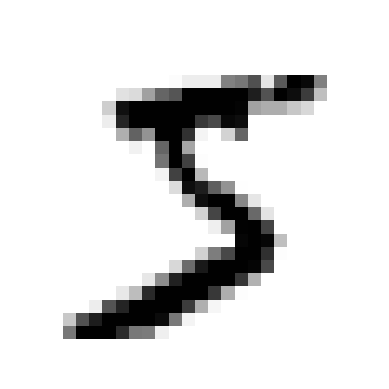

In [ ]:
def plot_digit(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image, cmap='binary')
    plt.axis("off")

plot_digit(X_train[0])
plt.show()

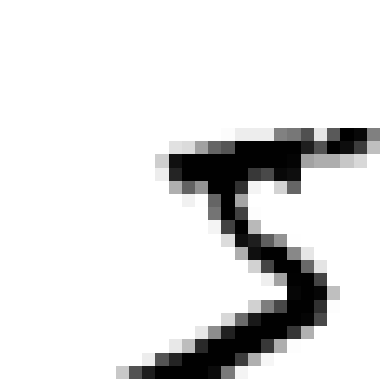

In [ ]:
from scipy.ndimage import shift

image = X[0].reshape(28, 28)
image_shifted = shift(image, [4, 4], cval=0)
plot_digit(image_shifted)
plt.show()

In [ ]:
# Making new Data set


n = len(X_train)

# 5 versions per image
X_shifted = np.zeros((n * 5, 784))
y_shifted = np.zeros(n * 5, dtype=y_train.dtype)

for i in range(n):

    img = X_train[i].reshape(28, 28)

    X_shifted[5*i] = X_train[i]
    y_shifted[5*i] = y_train[i]

    shifted = shift(img, [1, 0], cval=0) # Down
    X_shifted[5*i + 1] = shifted.reshape(784,)
    y_shifted[5*i + 1] = y_train[i]

    shifted = shift(img, [0, 1], cval=0) # Right
    X_shifted[5*i + 2] = shifted.reshape(784,)
    y_shifted[5*i + 2] = y_train[i]

    shifted = shift(img, [-1, 0], cval=0) # Left
    X_shifted[5*i + 3] = shifted.reshape(784,)
    y_shifted[5*i + 3] = y_train[i]

    shifted = shift(img, [0, -1], cval=0) # Up
    X_shifted[5*i + 4] = shifted.reshape(784,)
    y_shifted[5*i + 4] = y_train[i]


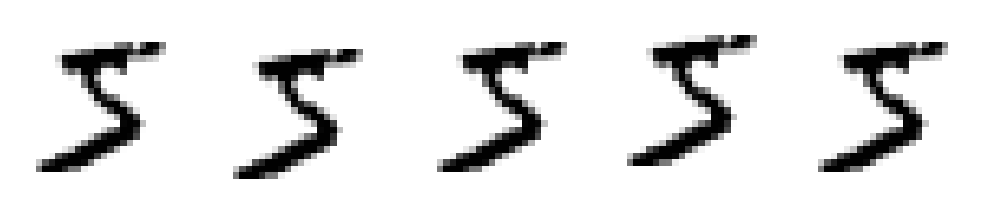

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3))

for i in range(5):
    plt.subplot(1, 5, i + 1)
    plot_digit(X_shifted[i])
    plt.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

final_model = KNeighborsClassifier(weights="distance",n_neighbors=4)
final_model.fit(X_shifted,y_shifted)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",4
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'distance'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(final_model,X_shifted,y_shifted,cv=3,scoring="accuracy")

array([0.97318, 0.97213, 0.97242])

In [ ]:
from sklearn.metrics import accuracy_score

y_prediction = final_model.predict(X_test)

accuracy = accuracy_score(y_test, y_prediction) * 100
f1 = f1_score(y_test, y_prediction, average="weighted") * 100

print(f"""
Test Set Evaluation Results
---------------------------
Accuracy : {accuracy:.2f}%
F1 Score : {f1:.2f}%
""")


Test Set Evaluation Results
---------------------------
Accuracy : 97.63%
F1 Score : 97.63%



## 3. Titanic Survivors

In [4]:
import pandas as pd
from pathlib import Path
import numpy as np


In [5]:
titanic_training_data=pd.read_csv(Path("/Users/sidharth/Desktop/Systems/Coding/Machine_Learning/datasets/titanic/train.csv"))
titanic_training_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen 'Carrie'",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [21]:
X_train = titanic_training_data.drop(columns="Survived",axis=-1)
y_train = titanic_training_data["Survived"]

In [60]:
X_train.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    str    
 3   Sex          891 non-null    str    
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    str    
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    str    
 10  Embarked     889 non-null    str    
dtypes: float64(2), int64(4), str(5)
memory usage: 76.7 KB


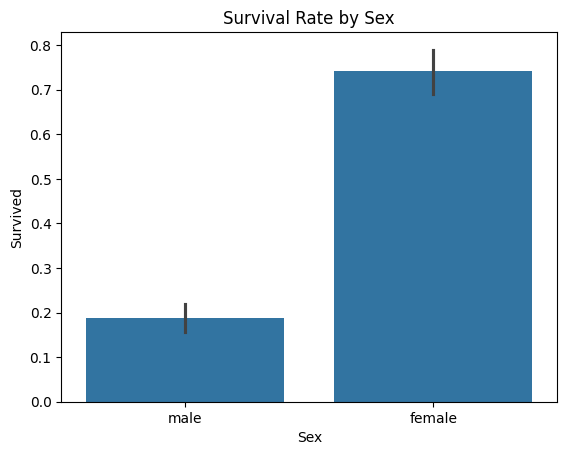

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x="Sex", y="Survived", data=titanic_training_data)
plt.title("Survival Rate by Sex")
plt.show()

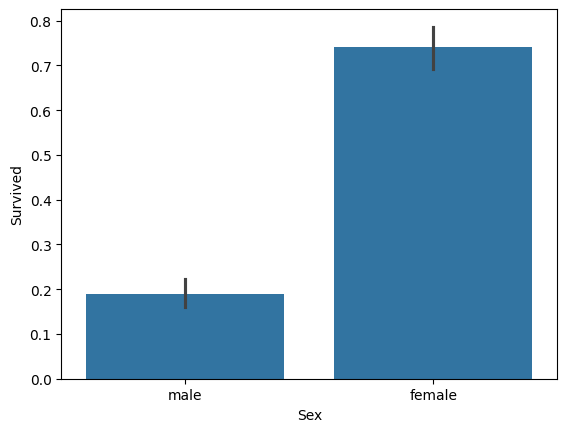

In [95]:
sns.barplot(x="Sex", y="Survived", data=titanic_training_data)
plt.show()

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                             StandardScaler())

char_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"),
                             OneHotEncoder(handle_unknown="ignore"))


preprocessing = ColumnTransformer([
    ("Numbers", num_pipeline, ["Age","Fare","SibSp"]),
    ("Characters", char_pipeline, ["Sex","Embarked","Pclass"]),
])



In [ ]:
from sklearn.linear_model import LogisticRegression

lr_class = make_pipeline(preprocessing, LogisticRegression(random_state=42))
lr_class.fit(X_train,y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('columntransformer', ...), ('logisticregression', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('Numbers', ...), ('Characters', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of 

In [87]:
from sklearn.model_selection import cross_val_score,cross_val_predict

lr_score = cross_val_score(lr_class,X_train,y_train,cv=10,scoring="accuracy")
lr_score.mean()

np.float64(0.7968789013732833)

In [82]:
from sklearn.ensemble import RandomForestClassifier

rdn_fr_class = make_pipeline(preprocessing, RandomForestClassifier(random_state=42))
rdn_fr_class.fit(X_train,y_train)

forest_score = cross_val_score(rdn_fr_class,X_train,y_train,cv=10,scoring="accuracy")
forest_score.mean()

np.float64(0.8126466916354558)

In [89]:
titanic_testing_data=pd.read_csv(Path("/Users/sidharth/Desktop/Systems/Coding/Machine_Learning/datasets/titanic/test.csv"))
titanic_testing_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [96]:
y_pred = rdn_fr_class.predict(titanic_testing_data)

In [97]:
submission = pd.DataFrame({
    "PassengerId": titanic_testing_data["PassengerId"],
    "Survived": y_pred
})

submission.to_csv("submission.csv", index=False)


# 4. Spam Classifier

In [159]:
import pandas as pd
import numpy as np
import re

In [160]:
import os

data = []
labels = []

spam_dir = "/Users/sidharth/Desktop/Systems/Coding/Machine_Learning/datasets/spam"
ham_dir = "/Users/sidharth/Desktop/Systems/Coding/Machine_Learning/datasets/easy_ham"

for filename in os.listdir(spam_dir):
    with open(os.path.join(spam_dir, filename), "r", encoding="latin-1") as f:
        data.append(f.read())
        labels.append(1)   # spam

for filename in os.listdir(ham_dir):
    with open(os.path.join(ham_dir, filename), "r", encoding="latin-1") as f:
        data.append(f.read())
        labels.append(0)   # ham

data = pd.Series(data)
labels = pd.Series(labels)

In [115]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10,test_size=0.2,random_state=42)

for train_index,test_index in splitter.split(data,labels):
    X_train = data.iloc[train_index]
    X_test  = data.iloc[test_index]

    y_train = labels.iloc[train_index]
    y_test  = labels.iloc[test_index]


In [161]:
import re
import string

def tokenize_email(text):
    text = text.lower()
    # 2. replace URLs
    text = re.sub(r"http\S+", " URL ", text)
    # 3. remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    tokens = text.split()
    tokens = ["number" if t.isdigit() else t for t in tokens]
    tokens = [t for t in tokens if t]
    return tokens


In [162]:
def build_vocabulary(tokenized_emails):
    vocab = set()
    
    for tokens in tokenized_emails:
        vocab.update(tokens)
    
    vocab = list(vocab)
    word_to_index = {word: idx for idx, word in enumerate(vocab)}
    
    return word_to_index


In [163]:
def vectorize_email(tokens, word_to_index):
    vector = [0] * len(word_to_index)
    
    for token in tokens:
        if token in word_to_index:
            vector[word_to_index[token]] += 1
    
    return vector

In [164]:
def vectorize_dataset(tokenized_emails, word_to_index):
    matrix = []
    
    for tokens in tokenized_emails:
        vector = vectorize_email(tokens, word_to_index)
        matrix.append(vector)
    
    return matrix

In [165]:
# 1. Tokenize
tokenized_train = X_train.apply(tokenize_email)

# 2. Build vocab from training only
word_to_index = build_vocabulary(tokenized_train)

# 3. Vectorize training set
X_train_matrix = vectorize_dataset(tokenized_train, word_to_index)

X_train_matrix = np.array(X_train_matrix)
print(X_train_matrix.shape)
print(np.count_nonzero(X_train_matrix[0]))

(2441, 70106)
497


In [166]:
X_train_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(2441, 70106))

In [185]:
from sklearn.feature_extraction.text import CountVectorizer

vectorization = CountVectorizer(tokenizer=tokenize_email,
                                lowercase=False)

X_train_sparse = vectorization.fit_transform(X_train)

/Users/sidharth/Desktop/Systems/Coding/venv/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:526: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [168]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_sparse,y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [169]:
from sklearn.model_selection import cross_val_score

cross_val_score(model,X_train_sparse,y_train,cv=3,scoring="accuracy")

array([0.9963145 , 0.9963145 , 0.99753998])

In [170]:
from sklearn.metrics import accuracy_score

X_test_sparse = vectorization.transform(X_test)
y_spam_prediction = model.predict(X_test_sparse)
accuracy_score(y_test,y_spam_prediction)

0.9934533551554828

In [181]:
feature_name = vectorization.get_feature_names_out()
feature_name

coefficients = model.coef_[0]

top_spam_indices = np.argsort(coefficients)[-20:]
top_spam_words = feature_name[top_spam_indices]

print("Top spam words:", top_spam_words)

Top spam words: ['by' 'html' 'webmasterefiie' 'xmailer' 'free' 'zzzzspamassassintaintorg'
 'cdt' 'mimeversion' 'contenttype' 'webnotenet' 'texthtml' 'your' 'please'
 'our' 'smtp' 'zzzzasonorg' 'phoboslabsspamassassintaintorg' 'you'
 'zzzzlocalhost' 'zzzzlocalhostspamassassintaintorg']
